In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
# 生成随机数据
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

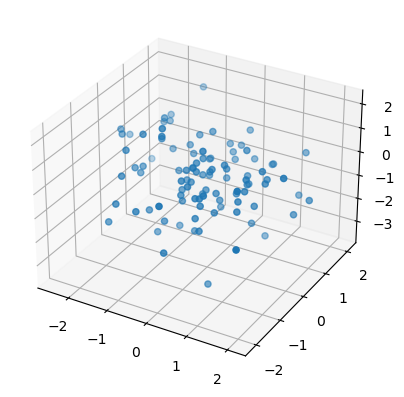

In [11]:
# 创建3D图形对象
fig =  plt.figure()
ax = fig.add_subplot(111, projection="3d")

# 绘制散点图
ax.scatter(x,y,z)

# 显示图形
plt.show()

# 绘制三维形状

In [ ]:
%matplotlib qt5

In [ ]:
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [176]:
angles = [108.79006195, 36, 87]
rot_order = "zyx"
# 计算坐标轴的数值
r = R.from_euler(rot_order, angles, degrees=True) #旋转顺序为 zyx 默认会将第一个数值当作z？
matrix = r.as_matrix()

# 计算旋转后的角度值
rot_angles = [-90,0,0]
r = R.from_euler("xyz", rot_angles, degrees=True)
rot_matrix = r.as_matrix()
result_angles = np.dot(angles, rot_matrix)
print(f"angles is:{angles}")
print(f"result_angles is: {result_angles}")

# 计算旋转后的坐标数值
r = R.from_euler(rot_order, result_angles, degrees=True) #旋转顺序为 zyx 默认会将第一个数值当作z？
result_matrix = r.as_matrix()


# 创建 3D 对象
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# 设置坐标轴范围
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])

# 设置只显示稀疏的刻度
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.zaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# 设置坐标轴标签
ax.set_xlabel("X Label", color="red")
ax.set_ylabel("Y Label", color="green")
ax.set_zlabel("Z Label", color="blue")

# 设置坐标轴颜色
ax.tick_params(axis="x", color="red")

# 设置坐标轴颜色
ax.scatter(0, 0, 0, color="black", s=100) # 绘制传感器位置
ax.quiver(0, 0, 0, 1, 0, 0, 
          color="red", length=0.5, linewidths=3) # 绘制 x 方向
ax.quiver(0, 0, 0, 0, 1, 0, 
          color="green", length=0.5, linewidth=3) # 绘制 y 方向
ax.quiver(0, 0, 0, 0, 0, 1, 
          color="blue", length=0.5, linewidth=3) # 绘制 z 方向

# 绘制传感器方向 
# ax.view_init(elev=30, azim=15) # 设置视角
ax.scatter(0.5, 0.5, 0.5, color="black", s=100) # 绘制传感器位置
ax.quiver(0.5, 0.5, 0.5,matrix[0,0],matrix[1,0],matrix[2,0], 
          color="red", length=0.5, linewidths=3) # 绘制 x 方向
ax.quiver(0.5, 0.5, 0.5,matrix[1,0],matrix[1,1],matrix[2,1], 
          color="green", length=0.5, linewidth=3) # 绘制 y 方向
ax.quiver(0.5, 0.5, 0.5,matrix[2,0],matrix[1,2],matrix[2,2], 
          color="blue", length=0.5, linewidth=3) # 绘制 z 方向

# 绘制全局坐标系 X 轴逆时针旋转 90度结果 
# ax.view_init(elev=30, azim=15) # 设置视角
ax.scatter(1.5, 1.5, 1.5, color="black", s=100) # 绘制传感器位置
ax.quiver(1.5, 1.5, 1.5, result_matrix[0,0], result_matrix[1,0], result_matrix[2,0], 
          color="red", length=0.5, linewidths=3) # 绘制 x 方向
ax.quiver(1.5, 1.5, 1.5, result_matrix[1,0], result_matrix[1,1], result_matrix[2,1], 
          color="green", length=0.5, linewidth=3) # 绘制 y 方向
ax.quiver(1.5, 1.5, 1.5, result_matrix[2,0], result_matrix[1,2], result_matrix[2,2], 
          color="blue", length=0.5, linewidth=3) # 绘制 z 方向

ax.set_title(f"rot_order: {rot_order}\nz angle: {int(angles[0])}, y angle: {int(angles[1])}, x angle:{int(angles[2])}")
plt.show()

angles is:[108.79006195, 36, 87]
result_angles is: [108.79006195 -87.          36.        ]


# 验证三个向量是否互相垂直

In [175]:
# 
import numpy as np
x = result_matrix[:,0] # x 方向的坐标
y = result_matrix[:,1] # y 方向的坐标
z = result_matrix[:,2] # z 方向的坐标

# 计算点积
xy = np.dot(x, y)
xz = np.dot(x, z)
yz = np.dot(y, z)

# 判断是否正交
# 点积为零则为正交

if abs(xy) < 1e-6 and abs(xz) < 1e-6 and abs(yz) < abs(xz):
    print("三个轴正交")
else:
    print("三个轴不正交")

三个轴不正交


In [ ]:
# 了解旋转矩阵的用法

In [228]:
init_angles = np.array([30, 60, 90])

rot_angles = [90,0,0]
r = R.from_euler("xyz", rot_angles, degrees=True)
rot_matrix = r.as_matrix()
print("旋转矩阵为:\n",np.round(rot_matrix,0))

rotated_angles = np.matmul(rot_matrix, init_angles) # dot 主要适用2维矩阵点乘 matmul适合多维 
print("旋转前的角度为：\n", init_angles)
print("旋转后的角度为：\n", rotated_angles)

旋转矩阵为:
 [[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]
旋转前的角度为：
 [30 60 90]
旋转后的角度为：
 [ 30. -90.  60.]
